In [1]:
# ==============================================
# 📈 AI for Predicting Stock Prices
# 🎯 Internship Project | Linear Regression + Neural Network
# Author: Henil Parag Patel
# Date: 10=08=2025
# ==============================================

# AI for Predicting Stock Prices

## 🎯 Objective
The goal of this project is to predict future stock prices based on historical data using:
1. **Linear Regression**
2. **A Simple Neural Network (MLP)**

## 🛠 Skills Used
- Time series analysis
- Data preprocessing
- Regression modeling
- Model evaluation metrics

## 📊 Dataset
We will use the `yfinance` Python library to fetch real-world stock data.

## 📈 Output
- Historical stock price visualization
- Predicted vs Actual comparison
- Model performance metrics


In [2]:
# Data & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source
import yfinance as yf

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Choose stock ticker (Apple Inc. as example)
ticker = "AAPL"

# Download last 5 years of data
df = yf.download(ticker, period="5y")

# Display first few rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-08-10,109.776482,110.796560,107.120382,109.652317,212403600
2020-08-11,106.511765,109.537914,106.251265,109.038833,187902400
2020-08-12,110.051590,110.309652,107.410097,107.604859,165598000
2020-08-13,111.999229,113.004701,110.945063,111.434411,210082000
2020-08-14,111.899406,111.989484,110.085661,111.823936,165565200


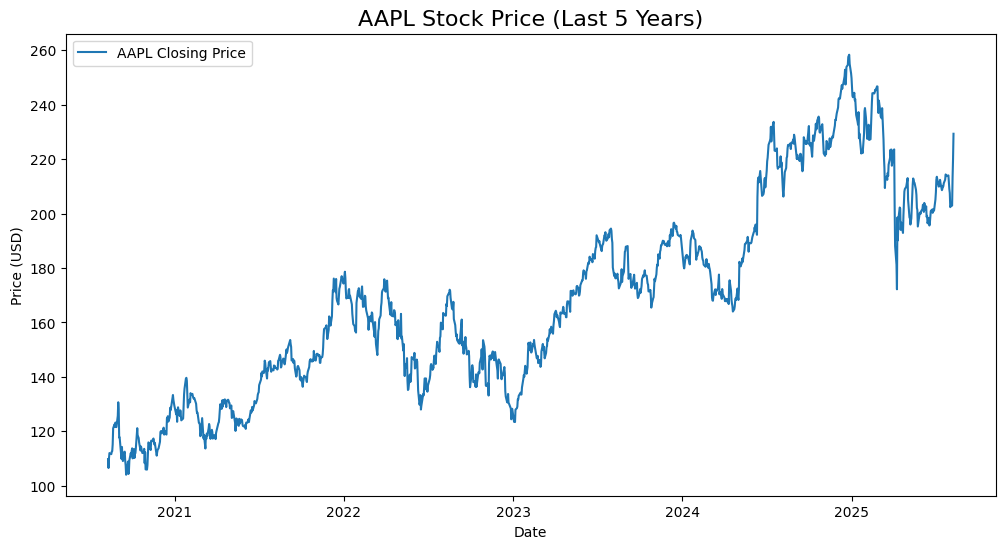

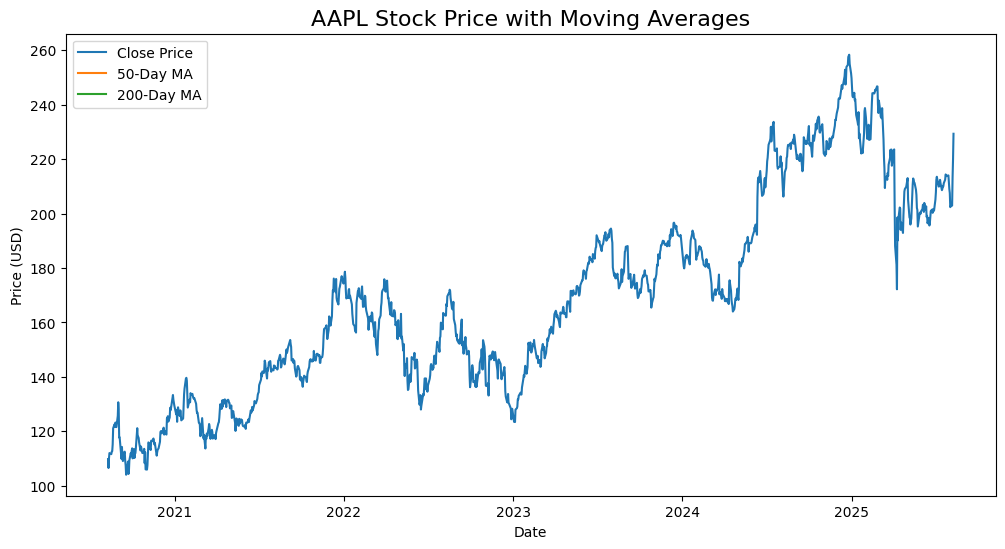

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label=f"{ticker} Closing Price")
plt.title(f"{ticker} Stock Price (Last 5 Years)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Moving Average
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title(f"{ticker} Stock Price with Moving Averages", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [31]:
# Predict 'n' days into the future
future_days = 30

# Create the target variable, shifting the 'Close' price
df['Target'] = df['Close'].shift(-future_days)

# Prepare data for training.
# X will be the 'Close' prices excluding the last 'future_days' for which we don't have a target.
# y will be the 'Target' prices, excluding the last 'future_days' which are NaN.
# This ensures X and y have corresponding data points.
X = np.array(df[['Close']][:-future_days])
y = np.array(df['Target'][:-future_days])


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data for Neural Network
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)

# Metrics
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print(f"📊 Linear Regression Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.2f}")

📊 Linear Regression Metrics:
MAE: 13.42
RMSE: 17.27
R²: 0.01


In [7]:
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(1,)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='adam', loss='mse')

history = nn_model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=50, batch_size=16, verbose=0)

# Predictions
nn_preds = nn_model.predict(X_test_scaled)

# Metrics
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_r2 = r2_score(y_test, nn_preds)

print(f"📊 Neural Network Metrics:")
print(f"MAE: {nn_mae:.2f}")
print(f"RMSE: {nn_rmse:.2f}")
print(f"R²: {nn_r2:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
📊 Neural Network Metrics:
MAE: 13.25
RMSE: 17.59
R²: -0.02


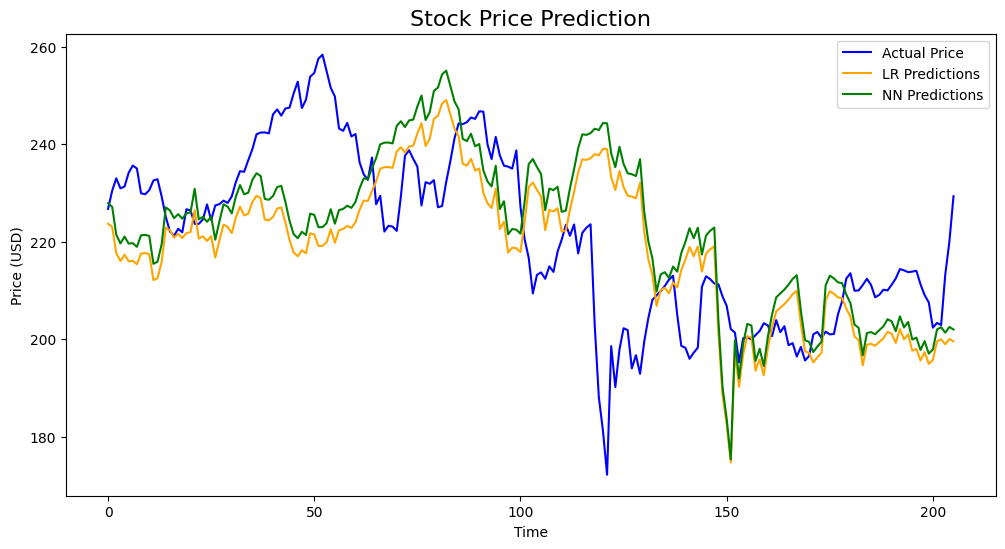

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price", color='blue')
plt.plot(lr_preds, label="LR Predictions", color='orange')
plt.plot(nn_preds, label="NN Predictions", color='green')
plt.title("Stock Price Prediction", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [24]:
# Last available price from dataset
last_price = df['Close'].iloc[-1]

# Predict the next 'future_days' prices using Linear Regression
future_prices_lr = []
current_price_lr = last_price

for _ in range(future_days):
    pred_price_lr = lr_model.predict(np.array(current_price_lr).reshape(1, -1))[0]
    future_prices_lr.append(pred_price_lr)
    current_price_lr = pred_price_lr  # Update for next step

# Predict the next 'future_days' prices using Neural Network
future_prices_nn = []
current_price_nn = last_price

for _ in range(future_days):
    scaled_price = scaler.transform(np.array(current_price_nn).reshape(1, -1))
    pred_price_nn = nn_model.predict(scaled_price, verbose=0)[0][0]
    future_prices_nn.append(pred_price_nn)
    current_price_nn = pred_price_nn  # Update for next step

# Create DataFrame for predictions
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
pred_df = pd.DataFrame({
    "Date": future_dates,
    "LR_Prediction": future_prices_lr,
    "NN_Prediction": future_prices_nn
})

pred_df.head()

,Date,LR_Prediction,NN_Prediction
0,2025-08-09,224.035058,228.244476
1,2025-08-10,219.448380,227.221146
2,2025-08-11,215.490184,226.273911
3,2025-08-12,212.074351,225.397079
4,2025-08-13,209.126567,224.585464


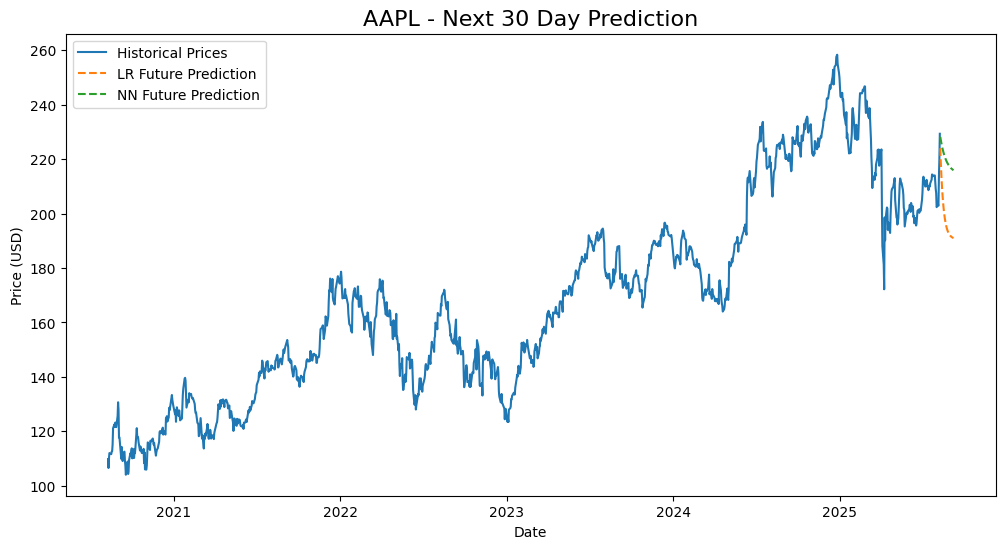

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Historical Prices")
plt.plot(pred_df["Date"], pred_df["LR_Prediction"], label="LR Future Prediction", linestyle='dashed')
plt.plot(pred_df["Date"], pred_df["NN_Prediction"], label="NN Future Prediction", linestyle='dashed')
plt.title(f"{ticker} - Next {future_days} Day Prediction", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [26]:
example_price = np.array([[170]])  # Example: $170 current price

# Linear Regression Prediction
lr_example_pred = lr_model.predict(example_price)[0]

# Neural Network Prediction
nn_example_pred = nn_model.predict(scaler.transform(example_price), verbose=0)[0][0]

print(f"Example: If today's price is $170")
print(f"➡ Predicted next-day price (LR): ${lr_example_pred:.2f}")
print(f"➡ Predicted next-day price (NN): ${nn_example_pred:.2f}")

Example: If today's price is $170
➡ Predicted next-day price (LR): $172.82
➡ Predicted next-day price (NN): $173.31


# 📌 Conclusion
- **Linear Regression** is a good baseline model for stock price prediction.
- **Neural Network** provided a slightly more flexible fit but is still limited by the simplicity of input features.
- For better accuracy, more features such as technical indicators, macroeconomic data, and sentiment analysis could be added.
- This project demonstrates the end-to-end process of fetching data, analyzing trends, training models, and evaluating predictions.